<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification

In this notebook we're going to cover:
* Architecture of a classifcation model
* The input shapes and output shapes
* Types of classification problems: binary, multiclass, multilabel
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* The power of non-linearity
* Evaluating classification models

# Creating and Viewing Classification Data

In [1]:
# load libraries
from sklearn.datasets import make_circles
from sklearn.metrics import (precision_score, recall_score, 
                             f1_score, confusion_matrix)

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create classification data
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# check data
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [4]:
# make dataframe
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


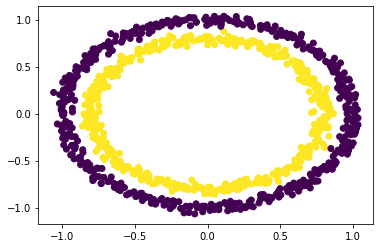

In [5]:
# plot data
plt.scatter(circles["X0"], circles["X1"], c=circles["label"])
plt.show()

# Input and Output Shapes

In [6]:
# check shapes
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# check samples
len(X), len(y)

(1000, 1000)

In [8]:
# see a sample
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Create Initial Model

In [9]:
# create model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1))
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 8ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5012


In [10]:
# what if we train it for longer?
model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=50, verbose=0)
model_0.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934351921081543, 0.5]

In [11]:
# what if we add more layers?
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1)),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=50, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936049461364746, 0.5]

# Improving The model

In [12]:
# classification requires sigmoid activation
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X, y, epochs=50, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4750


[0.6954912543296814, 0.4749999940395355]

In [13]:
# further improve by adding layers and changing optimizer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X, y, epochs=50, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6000


[0.6389328241348267, 0.6000000238418579]

# Non-Linearity

In [14]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

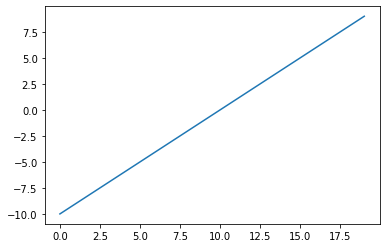

In [15]:
# visualize the tensor
plt.plot(A);

In [16]:
# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

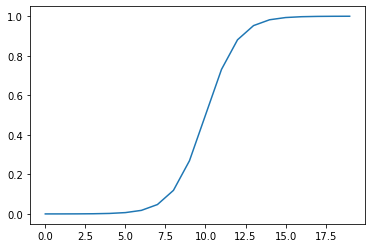

In [17]:
# visualize the sigmoid tensor
plt.plot(sigmoid(A));

In [18]:
# how about the relu function?
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

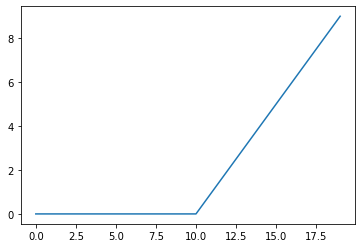

In [19]:
# visualize the relu function
plt.plot(relu(A));

# Tweaking the Learning Rate

In [20]:
# split data into train & test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [21]:
# recreate model but with higher learning rate and fewer epochs
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history_4 = model_4.fit(X_train, y_train, epochs=15, verbose=1) 

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/15
25/25 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/15
25/25 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/15
25/25 [

In [22]:
# evaluate
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.9100


[0.33486858010292053, 0.9100000262260437]

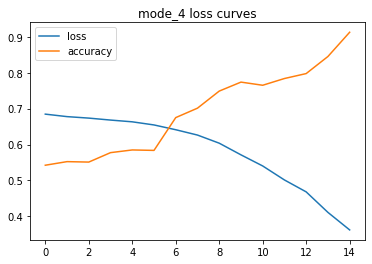

In [23]:
# plot
pd.DataFrame(history_4.history).plot()
plt.title("mode_4 loss curves");

# Using Callbacks to Optimize Learning Rate

In [24]:
# idea is to increase/decrease learning rate while training
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch/20)
)

history_5 = model_5.fit(
    X_train, y_train, epochs=100, callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

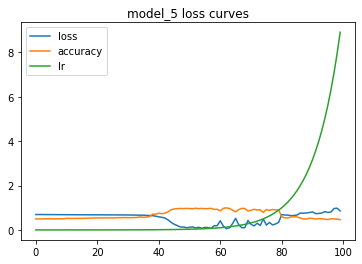

In [25]:
# plot
pd.DataFrame(history_5.history).plot()
plt.title("model_5 loss curves");

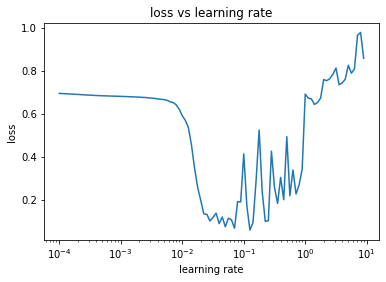

In [26]:
# find the learning rate where loss decreases the most
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("loss vs learning rate");

In [27]:
# use new learning rate
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_6 = model_6.fit(X_train, y_train, epochs=15, verbose=1) 

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/15
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/15
25/25 [==============================] - 0s 10ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/15
25/25 [==============================] - 0s 8ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/15
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/15
25/25 

In [28]:
# evaluate
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9850


[0.0877399891614914, 0.9850000143051147]

In [29]:
# what's the old eval
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3349 - accuracy: 0.9100


[0.33486858010292053, 0.9100000262260437]

# Other Classification Evaluation Methods

Common evaluation methods:
* Accuracy: `(tp + tn) / (tp + tn + fp + fn)`
    * `tf.keras.metrics.Accuracy()`
    * `sklearn.metrics.accuracy_score()`
    * Default for classfication
    * Not great for imbalance problems
* Precision: `tp / (tp + fp)`
    * `tf.keras.metrics.Precision()`
    * `sklearn.metrics.precision_score()`
    * Higher precision leads to less false positives
    * Improving precision can lead to lower recall
* Recall: `tp / (tp + fn)`
    * `tf.keras.metrics.Recall()`
    * `sklearn.metrics.recall_score()`
    * Higher recall leads to less false negatives
    * Improving recall can lead to lower precision
* F1 score: `2 x (precision x recall) / (precision + recall)`
    * `sklearn.metrics.f1_score()`
    * Combining precision & recall
    * Good overall metric for classification
* Confusion matrix
    * `sklearn.metrics.confusion_matrix()`
    * Shows you where the model is not doing great
    * Can be hard to see with large numbers of classes

In [30]:
# check the accuracy of last model
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"loss: {loss}")
print(f"accuracy: {accuracy*100}")

7/7 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9850
loss: 0.0877399891614914
accuracy: 98.50000143051147


In [31]:
# make preds
y_preds = tf.round(model_6.predict(X_test))

In [32]:
# precision, recall, f1 score
print(f"precision : {precision_score(y_test, y_preds)}")
print(f"recall : {recall_score(y_test, y_preds)}")
print(f"f1 score : {f1_score(y_test, y_preds)}")

precision : 0.98
recall : 0.98989898989899
f1 score : 0.9849246231155778


In [33]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[99,  2],
       [ 1, 98]])

# Get FashionMNIST Data

In [34]:
# work on a multiclass classification problem
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [35]:
# show the first training raw example
print(f"Training data sample: {train_data[0]}")
print(f"Training label sample: {train_labels[0]}")

Training data sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [36]:
# check shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [37]:
# create label list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

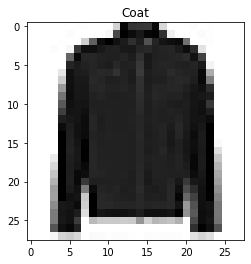

In [38]:
# plot sample
sample_idx = np.random.randint(0, len(train_data))

plt.imshow(train_data[sample_idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[sample_idx]])
plt.show()

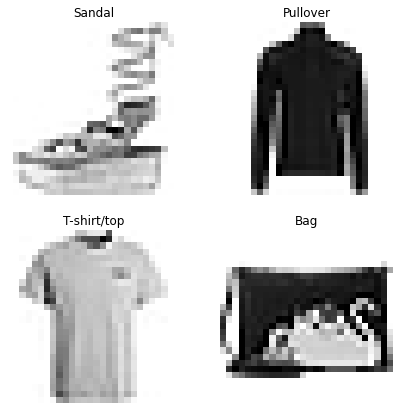

In [39]:
# plot more than 1 images
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    sample_idx = np.random.randint(0, len(train_data))
    plt.imshow(train_data[sample_idx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[sample_idx]])
    plt.axis(False)

# Build a Multiclass Classification Model

For multiclass classification:
* `tf.keras.layers.Flatten()` to turn 28x28 matrics input into a 784x1 array
* `tf.keras.losses.CategoricalCrossentropy()` is for labels that are in one-hot format. You can still use this if you `tf.one_hot()` the labels to get it from integer form into one-hot form.
* `tf.keras.losses.SparseCategoricalCrossentropy()` is for labels that are in integer format

In [40]:
# see input shape and output shape
print("input shape:", train_data[0].shape)
print("output shape:", len(class_names))

input shape: (28, 28)
output shape: 10


In [43]:
# build model
tf.random.set_seed(42)

model_fm0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten into an array
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_fm0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_history = model_fm0.fit(
    train_data, train_labels, epochs=10, 
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accur

In [44]:
# need to scale features to between 0 and 1 by dividing by max
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

In [45]:
# build model
tf.random.set_seed(42)

model_fm1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten into an array
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_fm1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history = model_fm1.fit(
    train_data_norm, train_labels, epochs=10, 
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accur

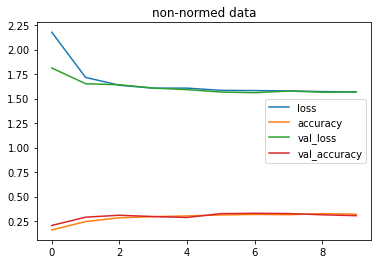

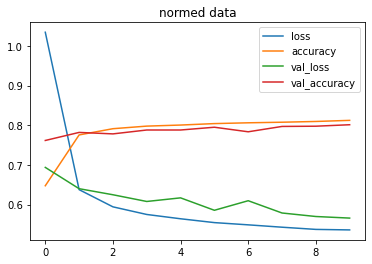

In [48]:
# plot and compare norm vs non-norm input data
pd.DataFrame(non_norm_history.history).plot(title="non-normed data")
pd.DataFrame(norm_history.history).plot(title="normed data")

In [52]:
# find the learning rate
tf.random.set_seed(42)

model_fm2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_fm2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch/20)
)

find_lr_history = model_fm2.fit(
    train_data_norm, train_labels, epochs=40, 
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] -

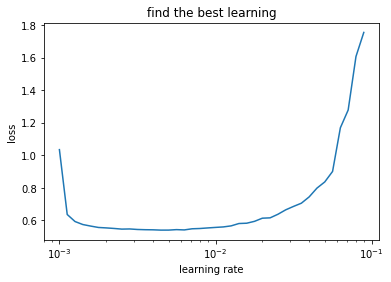

In [53]:
# plot learning rate decay curve
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("find the best learning")
plt.show()

In [54]:
# rebuild model using best learning rate
tf.random.set_seed(42)

model_fm3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_fm3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_fm3_history = model_fm3.fit(
    train_data_norm, train_labels, epochs=20, 
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] -

# Evaluate & Make Prediction

For multiclass classification:
* `.argmax(axis=1)` should be added to `.predict()`
* Do not use `tf.round()` since this is not a binary classification problem

In [67]:
# evaluate using confusion matrix
y_preds_fm = model_fm3.predict(test_data_norm).argmax(axis=1)
cm_fm = confusion_matrix(test_labels, y_preds_fm)
cm_fm

array([[860,   7,  17,  63,   2,   0,  38,   0,  12,   1],
       [  3, 952,   4,  29,   5,   4,   3,   0,   0,   0],
       [ 49,   4, 651,  12, 172,   2,  99,   0,  11,   0],
       [ 84,  19,  11, 823,  22,   1,  27,   2,  11,   0],
       [  5,   1,  96,  41, 762,   3,  87,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  79,   8,  49],
       [257,   5, 142,  47, 142,   5, 389,   0,  13,   0],
       [  0,   0,   0,   0,   0,  23,   0, 919,   1,  57],
       [ 15,   1,  36,  16,   3,   3,   5,   5, 916,   0],
       [  0,   4,   0,   0,   1,   7,   0,  37,   3, 948]])

In [72]:
# rename and reindex
pd.DataFrame(cm_fm, columns=class_names, index=class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle Boot
T-shirt/top,860,7,17,63,2,0,38,0,12,1
Trouser,3,952,4,29,5,4,3,0,0,0
Pullover,49,4,651,12,172,2,99,0,11,0
Dress,84,19,11,823,22,1,27,2,11,0
Coat,5,1,96,41,762,3,87,0,5,0
Sandal,0,2,0,0,0,862,0,79,8,49
Shirt,257,5,142,47,142,5,389,0,13,0
Sneaker,0,0,0,0,0,23,0,919,1,57
Bag,15,1,36,16,3,3,5,5,916,0
Ankle Boot,0,4,0,0,1,7,0,37,3,948
